# Introduction to Machine Learning

## Exercise 3  (DBSCAN)

In this exercise we'll use the DBSCAN algorithm to cluster an examplary dataset. We will start by calculating the clustering by hand and then move on to implement the solution.
This notebooks servers as a guide to the exercise.

### Density Based Spatial Clustering of Applications with Noise (DBSCAN)

You are given the following dataset. 

![Data Set](dataset.png "Data Set")

Apply the DBSCAN to cluster this dataset. Note for every point whether it is a core, border or noise point. Use the [Manhattan Distance](https://en.wikipedia.org/wiki/Taxicab_geometry) as your distance function and the following parameters:  

* ε = 1.1 and minPts = 2  

### DBSCAN using scikit-learn

Familiarize yourself with the scikit-learn implementation of DBSCAN [(1)](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) [(2)](http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html).  
Write a short program that clusters the dataset you worked on in the first part of the exercise. Visualize your results.

In [32]:
import numpy as np

from sklearn.cluster import DBSCAN               # import sklearn.cluster.DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt

In [33]:
data = np.array([[1,1], [2,1], [1,2], [2,2], [3,5], [3,9], [3,10], [4,10], [5,10], [4,11], [7,10], [10,9], [10,6], [9,5], [10,5], [11,5], [9,4], [10,4], [11,4], [10,3]])

# Compute DBSCAN
db = DBSCAN(eps=1.1, min_samples=3, metric='manhattan').fit(data)
db

DBSCAN(algorithm='auto', eps=1.1, leaf_size=30, metric='manhattan',
    metric_params=None, min_samples=3, n_jobs=1, p=None)

In [34]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

labels

array([ 0,  0,  0,  0, -1,  1,  1,  1,  1,  1, -1, -1,  2,  2,  2,  2,  2,
        2,  2,  2])

In [35]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [36]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

In [37]:
# Assigne a color to each lable
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

#len(colors)
colors

[(0.61960784313725492, 0.0039215686274509803, 0.25882352941176473, 1.0),
 (0.99346405228758172, 0.74771241830065349, 0.43529411764705872, 1.0),
 (0.74771241830065382, 0.89803921568627465, 0.62745098039215685, 1.0),
 (0.36862745098039218, 0.30980392156862746, 0.63529411764705879, 1.0)]

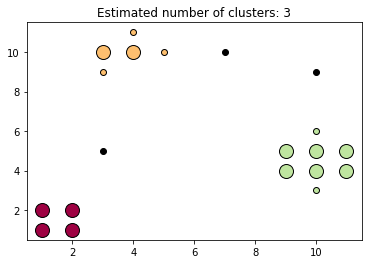

In [38]:
# Plot every point
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()